In [2]:
# https://dbr.donga.com/article/view/1203/article_no/8181
# https://www.arxiv-vanity.com/papers/1503.08895/

In [3]:
import pickle
import numpy as np

In [4]:
with open('train_qa.txt', 'rb') as fp:
    train_data = pickle.load(fp)

In [5]:
with open('test_qa.txt', 'rb') as fp:
    test_data = pickle.load(fp)

In [6]:
print(f"train data:{len(train_data)}, teset data: {len(test_data)}")

train data:10000, teset data: 1000


In [7]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [8]:
type(train_data[0])

tuple

In [9]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2]

'no'

In [12]:
# vocabulary 
vocab = set()

In [13]:
all_data = train_data + test_data

In [14]:
for story, question, answer in all_data:
    # python set -> union -> collection set -> 합집합
    # 1,2,3,4,5
    # 2,3,5,6,8
    # 1,2,3,4,5,6,8
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [15]:
vocab.add('no')
vocab.add('yes')

In [16]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [17]:
vocab_len = len(vocab) + 1 # pad_sequences -> 0 

In [18]:
max_story_len = max([ len(data[0]) for data in all_data]) #? 

In [19]:
max_question_len = max([ len(data[1]) for data in all_data]) #? 

In [20]:
print(f"max story length:{max_story_len}, max question length: {max_question_len}")

max story length:156, max question length: 6


In [21]:
vocab_size = len(vocab) + 1

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [23]:
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)

In [24]:
tokenizer.word_index

{'got': 1,
 'garden': 2,
 'picked': 3,
 'in': 4,
 'sandra': 5,
 'apple': 6,
 'left': 7,
 'kitchen': 8,
 'john': 9,
 'to': 10,
 '?': 11,
 'bedroom': 12,
 'is': 13,
 'dropped': 14,
 'the': 15,
 '.': 16,
 'moved': 17,
 'grabbed': 18,
 'hallway': 19,
 'down': 20,
 'football': 21,
 'took': 22,
 'back': 23,
 'up': 24,
 'discarded': 25,
 'travelled': 26,
 'went': 27,
 'bathroom': 28,
 'yes': 29,
 'office': 30,
 'daniel': 31,
 'milk': 32,
 'put': 33,
 'there': 34,
 'journeyed': 35,
 'mary': 36,
 'no': 37}

In [25]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [26]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [27]:
len(train_story_text)

10000

In [28]:
len(train_story_seq)

10000

In [29]:
train_story_seq

[[36, 17, 10, 15, 28, 16, 5, 35, 10, 15, 12, 16],
 [36,
  17,
  10,
  15,
  28,
  16,
  5,
  35,
  10,
  15,
  12,
  16,
  36,
  27,
  23,
  10,
  15,
  12,
  16,
  31,
  27,
  23,
  10,
  15,
  19,
  16],
 [36,
  17,
  10,
  15,
  28,
  16,
  5,
  35,
  10,
  15,
  12,
  16,
  36,
  27,
  23,
  10,
  15,
  12,
  16,
  31,
  27,
  23,
  10,
  15,
  19,
  16,
  5,
  27,
  10,
  15,
  8,
  16,
  31,
  27,
  23,
  10,
  15,
  28,
  16],
 [36,
  17,
  10,
  15,
  28,
  16,
  5,
  35,
  10,
  15,
  12,
  16,
  36,
  27,
  23,
  10,
  15,
  12,
  16,
  31,
  27,
  23,
  10,
  15,
  19,
  16,
  5,
  27,
  10,
  15,
  8,
  16,
  31,
  27,
  23,
  10,
  15,
  28,
  16,
  31,
  3,
  24,
  15,
  21,
  34,
  16,
  31,
  27,
  10,
  15,
  12,
  16],
 [36,
  17,
  10,
  15,
  28,
  16,
  5,
  35,
  10,
  15,
  12,
  16,
  36,
  27,
  23,
  10,
  15,
  12,
  16,
  31,
  27,
  23,
  10,
  15,
  19,
  16,
  5,
  27,
  10,
  15,
  8,
  16,
  31,
  27,
  23,
  10,
  15,
  28,
  16,
  31,
  3,
  24,
  15,

In [30]:
tokenizer.word_index

{'got': 1,
 'garden': 2,
 'picked': 3,
 'in': 4,
 'sandra': 5,
 'apple': 6,
 'left': 7,
 'kitchen': 8,
 'john': 9,
 'to': 10,
 '?': 11,
 'bedroom': 12,
 'is': 13,
 'dropped': 14,
 'the': 15,
 '.': 16,
 'moved': 17,
 'grabbed': 18,
 'hallway': 19,
 'down': 20,
 'football': 21,
 'took': 22,
 'back': 23,
 'up': 24,
 'discarded': 25,
 'travelled': 26,
 'went': 27,
 'bathroom': 28,
 'yes': 29,
 'office': 30,
 'daniel': 31,
 'milk': 32,
 'put': 33,
 'there': 34,
 'journeyed': 35,
 'mary': 36,
 'no': 37}

In [31]:
'''
INPUT)
data: Stories + Questions + Answers
word_index: Tokenizer -> dictionary (word_index)
max_story_len: the length of the longest story (pad_sequences)
max_question_len: the length of the longest question (pas_sequecnes)
OUTPUT)
Vector: Stories + Questions + Answers (padded sequences)
'''
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):
    # STORIES
    X = []
    # QUESTIONS
    Xq = []
    # ANSWERS 
    Y = []
    
    for story, question, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in question]
        y = np.zeros(len(word_index) + 1)# Answer (Y/N)
        # [0. 0. 0. 0. 0. 0. 0. 0. 0 .... 0. 0. 0. 0. 1. 0.] -> no
        # [0. 0. 0. 0. 0. 0. 0. 0. 0 .... 0. 1. 0. 0. 0. 0.] -> yes
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y)) 

In [32]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [33]:
print(f"inputs_train: {len(inputs_train)}, questions_train: {len(questions_train)}, answers_train: {len(answers_train)}")

inputs_train: 10000, questions_train: 10000, answers_train: 10000


In [39]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [40]:
print(f"inputs_test: {len(inputs_test)}, questions_test: {len(questions_test)}, answers_test: {len(answers_test)}")

inputs_test: 1000, questions_test: 1000, answers_test: 1000


In [41]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 503.])

In [42]:
tokenizer.word_index['yes']

29

In [43]:
tokenizer.word_index['no']

37

Create a Model

In [44]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout # Permute: 주어진 패턴에 따라서 입력 차수 변경 
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM

In [45]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

Input Encoder m

In [49]:
input_encoder_m= Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

# Encoded -> (samples, story_maxlen, embedding_dim)

Input Encoder c

In [50]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# Output -> (samples, story_maxlen, question_maxlen)

Question Encoder

In [51]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# Output -> (samples, question_maxlen, embedding_dim)

In [52]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

pi = softmat()

In [53]:
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

Embedding C + pi

In [54]:
response = add([match, input_encoded_c]) #  (samples, story_maxlen, question_maxlex)
response = Permute((2,1))(response) #  (samples, question_maxlen, story_maxlex)

In [55]:
anwser = concatenate([response, question_encoded])

In [56]:
anwser

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [57]:
anwser = LSTM(32)(anwser) # (sampels, 32)

In [58]:
anwser = Dropout(0.5)(anwser) 
anwser = Dense(vocab_size)(anwser) # (samples, vocab_size) # YES/NO
anwser = Activation('softmax')(anwser) 

In [59]:
model = Model([input_sequence, question], anwser)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_1 (Sequential)      (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_3 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [61]:
r = model.fit([inputs_train, questions_train], answers_train, 
              batch_size=32, epochs=150, 
              validation_data=([inputs_test, questions_test], answers_test))

Epoch 1/150
313/313 [==============================] - 5s 10ms/step - loss: 1.0299 - accuracy: 0.4814 - val_loss: 0.7054 - val_accuracy: 0.5030
Epoch 2/150
313/313 [==============================] - 3s 9ms/step - loss: 0.7293 - accuracy: 0.4992 - val_loss: 0.6958 - val_accuracy: 0.5030
Epoch 3/150
313/313 [==============================] - 3s 9ms/step - loss: 0.7070 - accuracy: 0.4956 - val_loss: 0.6947 - val_accuracy: 0.4970
Epoch 4/150
313/313 [==============================] - 3s 9ms/step - loss: 0.7013 - accuracy: 0.5022 - val_loss: 0.6937 - val_accuracy: 0.5030
Epoch 5/150
313/313 [==============================] - 3s 9ms/step - loss: 0.6993 - accuracy: 0.5030 - val_loss: 0.6940 - val_accuracy: 0.4970
Epoch 6/150
313/313 [==============================] - 3s 9ms/step - loss: 0.6977 - accuracy: 0.4976 - val_loss: 0.6943 - val_accuracy: 0.4970
Epoch 7/150
313/313 [==============================] - 3s 9ms/step - loss: 0.6967 - accuracy: 0.4980 - val_loss: 0.6956 - val_accuracy: 0.497

In [62]:
filename = "chatbot_150_epochs_0329.h5"
model.save(filename)

Evaluate the Model

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


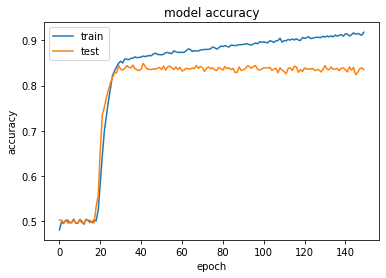

In [83]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
model.load_weights(filename)
pred_result = model.predict(([inputs_test, questions_test]))

In [85]:
test_data[998][0]

['Mary',
 'moved',
 'to',
 'the',
 'kitchen',
 '.',
 'Mary',
 'travelled',
 'to',
 'the',
 'office',
 '.',
 'Daniel',
 'picked',
 'up',
 'the',
 'milk',
 'there',
 '.',
 'Sandra',
 'went',
 'to',
 'the',
 'garden',
 '.',
 'Sandra',
 'grabbed',
 'the',
 'apple',
 'there',
 '.',
 'Sandra',
 'dropped',
 'the',
 'apple',
 '.',
 'Daniel',
 'dropped',
 'the',
 'milk',
 '.',
 'Mary',
 'went',
 'to',
 'the',
 'garden',
 '.']

In [86]:
story = ' '.join(word for word in test_data[998][0])
print(story)

Mary moved to the kitchen . Mary travelled to the office . Daniel picked up the milk there . Sandra went to the garden . Sandra grabbed the apple there . Sandra dropped the apple . Daniel dropped the milk . Mary went to the garden .


In [87]:
question = ' '.join(word for word in test_data[998][1])
print(question)

Is Sandra in the garden ?


In [88]:
print("Test Answer: ", test_data[998][2])

Test Answer:  yes


In [71]:
val_max = np.argmax(pred_result[998])

In [72]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [73]:
print("Precited answer: ", k)

Precited answer:  yes


In [74]:
print(pred_result[998][val_max])

0.9981414


In [75]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [76]:
my_question = "Is the football in the garden ?"
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [89]:
my_data = [ (my_story.split(), my_question.split(), 'yes')]

In [91]:
my_story, my_question, my_answer = vectorize_stories(mydata)

In [92]:
pred_result = model.predict( ([my_story, my_question]) )

In [93]:
val_max = np.argmax(pred_result[0])
val_max

29

In [94]:
'''
in  :  1
yes  :  2
mary  :  3
milk  :  4
?  :  5
daniel  :  6
office  :  7
journeyed  :  8
apple  :  9
there  :  10
travelled  :  11
sandra  :  12
.  :  13
bedroom  :  14
put  :  15
left  :  16
is  :  17
john  :  18
down  :  19
the  :  20
up  :  21
moved  :  22
discarded  :  23
garden  :  24
went  :  25
to  :  26
no  :  27
picked  :  28
dropped  :  29
back  :  30
kitchen  :  31
got  :  32
grabbed  :  33
hallway  :  34
took  :  35
football  :  36
bathroom  :  37
'''

'\nin  :  1\nyes  :  2\nmary  :  3\nmilk  :  4\n?  :  5\ndaniel  :  6\noffice  :  7\njourneyed  :  8\napple  :  9\nthere  :  10\ntravelled  :  11\nsandra  :  12\n.  :  13\nbedroom  :  14\nput  :  15\nleft  :  16\nis  :  17\njohn  :  18\ndown  :  19\nthe  :  20\nup  :  21\nmoved  :  22\ndiscarded  :  23\ngarden  :  24\nwent  :  25\nto  :  26\nno  :  27\npicked  :  28\ndropped  :  29\nback  :  30\nkitchen  :  31\ngot  :  32\ngrabbed  :  33\nhallway  :  34\ntook  :  35\nfootball  :  36\nbathroom  :  37\n'

In [95]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [96]:
print("Precited answer: ", k)
print(pred_result[0][val_max])

Precited answer:  yes
0.99891293
